## Adding XYZ methode fields to Boring dataframe

In [1]:
%matplotlib inline

In [2]:
from pydov.types.fields import XmlField, XsdType
from pydov.types.boring import Boring

class BoringMethodeXyz(Boring):
    
    __generiekeDataCodes = 'https://www.dov.vlaanderen.be/xdov/schema/latest/xsd/kern/generiek/GeneriekeDataCodes.xsd'
    
    fields = Boring.extend_fields([
        XmlField(name='methode_xy',
                 source_xpath='/boring/xy/methode_opmeten',
                 definition='Methode waarop de x en y-coordinaat opgemeten werden.',
                 datatype='string',
                 xsd_type=XsdType(
                     xsd_schema=__generiekeDataCodes,
                     typename='MethodeOpmetenXyEnumType')),
        XmlField(name='methode_mv',
                 source_xpath='/boring/oorspronkelijk_maaiveld/methode_opmeten',
                 definition='Methode waarop de Z-coördinaat van het maaiveld opgemeten werd.',
                 datatype='string',
                 xsd_type=XsdType(
                     xsd_schema=__generiekeDataCodes,
                     typename='MethodeOpmetenZEnumType')),
        XmlField(name='aanvangspeil_mtaw',
                 source_xpath='/boring/aanvangspeil/waarde',
                 definition='Hoogte in mTAW van het startpunt van de boring (boortafel, bouwput etc).',
                 datatype='float'),
        XmlField(name='methode_aanvangspeil',
                 source_xpath='/boring/aanvangspeil/methode_opmeten',
                 definition='Methode waarop de Z-coördinaat van het aanvangspeil opgemeten werd.',
                 datatype='string',
                 xsd_type=XsdType(
                     xsd_schema=__generiekeDataCodes,
                     typename='MethodeOpmetenZEnumType'))
    ])

In [3]:
from pydov.search.boring import BoringSearch

bs = BoringSearch(objecttype=BoringMethodeXyz)

In [4]:
bs.get_fields()['methode_mv']

{'cost': 10,
 'definition': 'Methode waarop de Z-co\xc3\xb6rdinaat van het maaiveld opgemeten werd.',
 'name': 'methode_mv',
 'notnull': False,
 'query': False,
 'type': 'string',
 'values': {'DHM_v1 100m*100m': None,
  'DHM_v1 25m*25m': None,
  'DHM_v1 5m*5m': None,
  'DHM_v2': None,
  'GPS': None,
  'GPS - RTK FLEPOS': None,
  'GPS - RTK FLEPOS (model hBG03)': None,
  'GPS - RTK FLEPOS (model hBG18)': None,
  'GPS statische fasemeting': None,
  'afgeleid van topokaart': None,
  'berekend op basis van hoogteverschil met maaiveld': None,
  'gedigitaliseerd in Google Earth': None,
  'methode onbekend': None,
  'niet te achterhalen': None,
  'topografisch ingemeten': None,
  'totaalstation': None,
  'uit dossier': None}}

In [5]:
from pydov.util.location import WithinDistance, Point

df = bs.search(location=WithinDistance(Point(150000, 150000), 10000, 'meter'),
               return_fields=('pkey_boring', 'boornummer', 'x', 'y', 'methode_xy', 
                              'mv_mtaw', 'methode_mv', 'aanvangspeil_mtaw', 
                              'methode_aanvangspeil', 'start_boring_mtaw'))

[000/361] ..................................................
[050/361] ..................................................
[100/361] ..................................................
[150/361] ..................................................
[200/361] ..................................................
[250/361] ..................................................
[300/361] ..................................................
[350/361] ...........


In [6]:
df.head()

,pkey_boring,boornummer,x,y,mv_mtaw,start_boring_mtaw,methode_xy,methode_mv,aanvangspeil_mtaw,methode_aanvangspeil
0,https://www.dov.vlaanderen.be/data/boring/1891...,BGD115E0018C.2,145692.0,157605.0,55.0,55.0,gedigitaliseerd op topokaart,afgeleid van topokaart,NaN,NaN
1,https://www.dov.vlaanderen.be/data/boring/1894...,vgmperceel6-B2,140857.0,151875.0,54.0,54.0,gedigitaliseerd op topokaart,afgeleid van topokaart,NaN,NaN
2,https://www.dov.vlaanderen.be/data/boring/1913...,vgmperceel6-B4,140236.0,150691.0,85.0,85.0,gedigitaliseerd op topokaart,afgeleid van topokaart,NaN,NaN
3,https://www.dov.vlaanderen.be/data/boring/1927...,vgmperceel6-B9,142139.0,151678.0,75.0,75.0,gedigitaliseerd op topokaart,afgeleid van topokaart,NaN,NaN
4,https://www.dov.vlaanderen.be/data/boring/1927...,vgmperceel6-B10,144692.0,152764.0,93.0,93.0,gedigitaliseerd op topokaart,afgeleid van topokaart,NaN,NaN


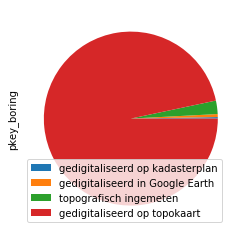

In [7]:
df_plot = df.groupby('methode_xy').count().pkey_boring.sort_values()

ax = df_plot.plot.pie(labels=None)

ax.set_aspect('equal')
ax.legend(loc=3, labels=df_plot.index)

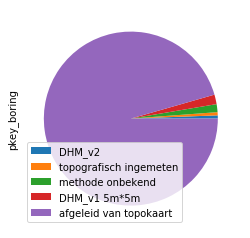

In [8]:
df_plot = df.groupby('methode_mv').count().pkey_boring.sort_values()

ax = df_plot.plot.pie(labels=None)
ax.set_aspect('equal')
ax.legend(loc=3, labels=df_plot.index)

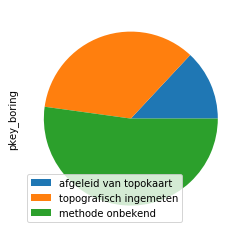

In [9]:
df_plot = df.groupby('methode_aanvangspeil').count().pkey_boring.sort_values()

ax = df_plot.plot.pie(labels=None)

ax.set_aspect('equal')
ax.legend(loc=3, labels=df_plot.index)

## Listing techniques per CPT measurement

In [10]:
from pydov.types.fields import XmlField, XsdType
from pydov.types.abstract import AbstractDovSubType
from pydov.types.sondering import Sondering


class Techniek(AbstractDovSubType):
    
    rootpath = './/sondering/sondeonderzoek/penetratietest/technieken'

    fields = [
        XmlField(name='techniek_diepte_van',
                 source_xpath='/diepte_van',
                 definition='Enkel van toepassing voor het plaatsen van voerbuizen - '
                            '(code V) of het boren door een harde laag (code B).',
                 datatype='float'),
        XmlField(name='techniek_diepte',
                 source_xpath='/diepte_techniek',
                 definition='Diepte waarop techniek toegepast werd.',
                 datatype='float'),
        XmlField(name='techniek',
                 source_xpath='/techniek',
                 definition='De gebruikte techniek.',
                 datatype='string',
                 xsd_type=XsdType(
                     xsd_schema='https://www.dov.vlaanderen.be/xdov/schema/latest/xsd/kern/sondering/SonderingDataCodes.xsd',
                     typename='SondeerTechniekEnumType')),
        XmlField(name='techniek_andere',
                 source_xpath='/techniek_andere',
                 definition="De gebruikte techniek (enkel van toepassing indien de techniek = 'andere').",
                 datatype='string')
    ]


class SonderingTechnieken(Sondering):
    subtypes = [Techniek]

In [11]:
from pydov.search.sondering import SonderingSearch

cpts = SonderingSearch(objecttype=SonderingTechnieken)

In [12]:
cpts.get_fields()['techniek']

{'cost': 10,
 'definition': 'De gebruikte techniek.',
 'name': 'techniek',
 'notnull': False,
 'query': False,
 'type': 'string',
 'values': {'B': 'sondeerbuizen door een harde laag geduwd of geboord',
  'E': 'sondeerbuizen op en neer bewogen',
  'S': 'uitvoering sondering tijdelijk onderbroken',
  'V': 'plaatsing van voerbuizen',
  'andere': 'een andere dan de standaard voorziene technieken'}}

In [13]:
from pydov.util.location import WithinDistance, Point

df = cpts.search(location=WithinDistance(Point(150000, 150000), 10000, 'meter'))

[000/067] ..................................................
[050/067] .................


In [14]:
df['techniek_label'] = df['techniek'].map(cpts.get_fields()['techniek']['values'])

In [15]:
df.head()

,pkey_sondering,sondeernummer,x,y,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,sondeermethode,apparaat,datum_gw_meting,diepte_gw_m,techniek_diepte_van,techniek_diepte,techniek,techniek_andere,techniek_label
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-79/291-SII,147245.0,158407.0,67.50,0.0,32.2,1979-08-20,Rijksinstituut voor Grondmechanica,discontinu mechanisch,200KN,NaT,1.95,7.4,7.4,V,NaN,plaatsing van voerbuizen
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-79/291-SI,147231.0,158421.0,67.60,0.0,32.6,1979-08-17,Rijksinstituut voor Grondmechanica,discontinu mechanisch,200KN,NaT,2.10,6.4,6.4,V,NaN,plaatsing van voerbuizen
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-79/291-SIII,147241.0,158388.0,69.40,0.0,33.2,1979-08-20,Rijksinstituut voor Grondmechanica,discontinu mechanisch,200KN,NaT,2.88,6.4,6.4,V,NaN,plaatsing van voerbuizen
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-79/199-SIV,145564.0,149739.0,126.06,0.0,8.2,1970-06-26,Rijksinstituut voor Grondmechanica,discontinu mechanisch,100KN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-79/199-SV,145546.0,149746.0,126.03,0.0,10.2,1979-06-25,Rijksinstituut voor Grondmechanica,discontinu mechanisch,100KN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


## Listing GxG for GrondwaterFilters

In [16]:
from pydov.types.fields import XmlField, XsdType
from pydov.types.abstract import AbstractDovSubType
from pydov.types.grondwaterfilter import GrondwaterFilter


class Gxg(AbstractDovSubType):
    
    rootpath = './/filtermeting/gxg'

    fields = [
        XmlField(name='gxg_jaar',
                 source_xpath='/jaar',
                 definition='jaar (hydrologisch jaar voor lg3 en hg3, kalenderjaar voor vg3)',
                 datatype='integer'),
        XmlField(name='gxg_hg3',
                 source_xpath='/hg3',
                 definition='gemiddelde van de drie hoogste grondwaterstanden in een hydrologisch '
                            'jaar (1 april t/m 31 maart) bij een meetfrequentie van tweemaal per maand',
                 datatype='float'),
        XmlField(name='gxg_lg3',
                 source_xpath='/lg3',
                 definition='gemiddelde van de drie laagste grondwaterstanden in een hydrologisch jaar '
                            '(1 april t/m 31 maart) bij een meetfrequentie van tweemaal per maand',
                 datatype='float'),
        XmlField(name='gxg_vg3',
                 source_xpath='/vg3',
                 definition='gemiddelde van de grondwaterstanden op 14 maart, 28 maart en 14 april in '
                            'een bepaald kalenderjaar',
                 datatype='float')
    ]


class GrondwaterFilterGxg(GrondwaterFilter):
    subtypes = [Gxg]

In [17]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
from owslib.fes import PropertyIsEqualTo

fs = GrondwaterFilterSearch(objecttype=GrondwaterFilterGxg)

In [18]:
fs.get_fields()['gxg_vg3']

{'cost': 10,
 'definition': 'gemiddelde van de grondwaterstanden op 14 maart, 28 maart en 14 april in een bepaald kalenderjaar',
 'name': 'gxg_vg3',
 'notnull': False,
 'query': False,
 'type': 'float'}

In [19]:
df = fs.search(
    query=PropertyIsEqualTo('pkey_filter', 'https://www.dov.vlaanderen.be/data/filter/1999-009146')
)

[000/001] c


In [20]:
df.head()

,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,mv_mtaw,gemeente,meetnet_code,aquifer_code,grondwaterlichaam_code,regime,diepte_onderkant_filter,lengte_filter,gxg_jaar,gxg_hg3,gxg_lg3,gxg_vg3
0,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,HOSP063,1,peilfilter,26878.0,199250.0,4.25,De Panne,9,0120,NaN,onbekend,1.69,0.75,2000,NaN,NaN,3.99
1,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,HOSP063,1,peilfilter,26878.0,199250.0,4.25,De Panne,9,0120,NaN,onbekend,1.69,0.75,2001,NaN,NaN,4.14
2,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,HOSP063,1,peilfilter,26878.0,199250.0,4.25,De Panne,9,0120,NaN,onbekend,1.69,0.75,2002,4.29,3.51,4.17
3,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,HOSP063,1,peilfilter,26878.0,199250.0,4.25,De Panne,9,0120,NaN,onbekend,1.69,0.75,2003,4.10,2.82,4.04
4,https://www.dov.vlaanderen.be/data/filter/1999...,https://www.dov.vlaanderen.be/data/put/2018-00...,HOSP063,1,peilfilter,26878.0,199250.0,4.25,De Panne,9,0120,NaN,onbekend,1.69,0.75,2004,3.84,2.95,3.91
